In [4]:
# Libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

In [8]:
# Read in data
load_data = pd.read_csv("data/load_3yback_NE.csv")
weather_data = pd.read_csv("data/weather_3yback_NE.csv")

In [9]:
# Quick look at data
load_data.head(n=10)

,Load Region,Source of Data,Local Datetime (Hour Ending),Time Zone,Load Type,Load MW,Load Market,Data Type,Record Count,Local Datetime (Hour Beginning),Month,Hour (Hour Ending 1-24),Day of Week,Holiday (Y/N),Weekday/Weekend,On Peak/Off Peak - EAST,Min Load MW,Max Load MW
0,.Z.CONNECTICUT,NE,10/22/2018 1:00,EDT,LOAD,2470.0,HOURLY,Actual,1,10/22/2018 0:00,10,1,Monday,N,Weekday,Off Peak,2470.0,2470.0
1,.Z.CONNECTICUT,NE,10/22/2018 2:00,EDT,LOAD,2397.0,HOURLY,Actual,1,10/22/2018 1:00,10,2,Monday,N,Weekday,Off Peak,2397.0,2397.0
2,.Z.CONNECTICUT,NE,10/22/2018 3:00,EDT,LOAD,2374.6,HOURLY,Actual,1,10/22/2018 2:00,10,3,Monday,N,Weekday,Off Peak,2374.6,2374.6
3,.Z.CONNECTICUT,NE,10/22/2018 4:00,EDT,LOAD,2392.0,HOURLY,Actual,1,10/22/2018 3:00,10,4,Monday,N,Weekday,Off Peak,2392.0,2392.0
4,.Z.CONNECTICUT,NE,10/22/2018 5:00,EDT,LOAD,2486.2,HOURLY,Actual,1,10/22/2018 4:00,10,5,Monday,N,Weekday,Off Peak,2486.2,2486.2
5,.Z.CONNECTICUT,NE,10/22/2018 6:00,EDT,LOAD,2751.4,HOURLY,Actual,1,10/22/2018 5:00,10,6,Monday,N,Weekday,Off Peak,2751.4,2751.4
6,.Z.CONNECTICUT,NE,10/22/2018 7:00,EDT,LOAD,3216.0,HOURLY,Actual,1,10/22/2018 6:00,10,7,Monday,N,Weekday,Off Peak,3216.0,3216.0
7,.Z.CONNECTICUT,NE,10/22/2018 8:00,EDT,LOAD,3474.2,HOURLY,Actual,1,10/22/2018 7:00,10,8,Monday,N,Weekday,On Peak,3474.2,3474.2
8,.Z.CONNECTICUT,NE,10/22/2018 9:00,EDT,LOAD,3494.3,HOURLY,Actual,1,10/22/2018 8:00,10,9,Monday,N,Weekday,On Peak,3494.3,3494.3
9,.Z.CONNECTICUT,NE,10/22/2018 10:00,EDT,LOAD,3448.1,HOURLY,Actual,1,10/22/2018 9:00,10,10,Monday,N,Weekday,On Peak,3448.1,3448.1


In [10]:
# Looking at subset of weather reports for Connecticut ISO Zone
weather_data[weather_data['Weather Station Name'] == 'Hartford Brainard Arpt']

,Weather Station Name,Local Datetime (Hour Beginning),Temperature (Dry Bulb) - Fahrenheit,Relative Humidity Percent,Local Datetime (Hour Ending)
26325,Hartford Brainard Arpt,10/22/2018 0:00,34.0,75.0,10/22/2018 1:00
26326,Hartford Brainard Arpt,10/22/2018 1:00,30.9,78.0,10/22/2018 2:00
26327,Hartford Brainard Arpt,10/22/2018 2:00,28.9,89.0,10/22/2018 3:00
26328,Hartford Brainard Arpt,10/22/2018 3:00,30.0,88.0,10/22/2018 4:00
26329,Hartford Brainard Arpt,10/22/2018 4:00,30.9,82.0,10/22/2018 5:00
...,...,...,...,...,...
52645,Hartford Brainard Arpt,10/22/2021 16:00,66.2,56.0,10/22/2021 17:00
52646,Hartford Brainard Arpt,10/22/2021 17:00,64.4,56.0,10/22/2021 18:00
52647,Hartford Brainard Arpt,10/22/2021 18:00,62.6,52.0,10/22/2021 19:00
52648,Hartford Brainard Arpt,10/22/2021 19:00,59.0,59.0,10/22/2021 20:00


Let's include weather station names as variables in our load dataset for merging purposes.
<br>
Mappings are: 
<br>
CONNETICUT - Hartford Brainard Arpt 
<br>
MAINE - Milinocket Arpt
<br>
NEWHAMPSHIRE - St Johnsbury
<br>
RHODEISLAND - Newport State Arpt
<br>
SEMASS - New Bedford Regional Arpt
<br>
VERMONT - Hartness State Springfield Arpt
<br>
WCMASS - Westfield Barnes Municipal Arpt
<br>
NEMASSBOST - Beverly Municipal Arpt

In [11]:
# Drop ISOs in load data we don't have weather data for (can go back and get later)
load_data = load_data[~load_data["Load Region"].isin([".Z.SEMASS",".Z.WCMASS",".Z.MAINE"])]

In [12]:
# Checking to make sure we have regions for each report
regions = load_data["Load Region"].unique()
regions

array(['.Z.CONNECTICUT', '.Z.NEMASSBOST', '.Z.NEWHAMPSHIRE',
       '.Z.RHODEISLAND', '.Z.VERMONT'], dtype=object)

In [13]:
stations = weather_data["Weather Station Name"].unique()

# Rearrange into correct list
idx = [1,0,4,3,2]
stations = stations[idx]

Creating a function to numerically assign ISO zones to weather regions.

In [14]:
def f(row):
    if row["Load Region"] == regions[0]:
        val = stations[0]
    elif row["Load Region"] == regions[1]:
        val = stations[1]
    elif row["Load Region"] == regions[2]:
        val = stations[2]
    elif row["Load Region"] == regions[3]:
        val = stations[3]
    elif row["Load Region"] == regions[4]:
        val = stations[4]
    return val

In [15]:
# Adding in weather station mappings
load_data["Weather Station Name"] = load_data.apply(f, axis=1)

For the purpose of this exercise I will restrict the data to only the Connecticut ISO zone. Note the same procedure can be applied to the other ISO NE regions.

In [16]:
connecticutLoad = load_data[load_data["Load Region"] == '.Z.CONNECTICUT']
len(connecticutLoad)

26256

# Merge datasets

Merge datasets by connecting each ISO Zone to relevant weather station. 
<br>


In [17]:
# Map weather to ISO zone by station name
connecticut = pd.merge(connecticutLoad, weather_data,  how='left', left_on=['Local Datetime (Hour Beginning)','Weather Station Name'], right_on = ['Local Datetime (Hour Beginning)','Weather Station Name'])
len(connecticut)

26256

In [18]:
connecticut.head()

,Load Region,Source of Data,Local Datetime (Hour Ending)_x,Time Zone,Load Type,Load MW,Load Market,Data Type,Record Count,Local Datetime (Hour Beginning),...,Day of Week,Holiday (Y/N),Weekday/Weekend,On Peak/Off Peak - EAST,Min Load MW,Max Load MW,Weather Station Name,Temperature (Dry Bulb) - Fahrenheit,Relative Humidity Percent,Local Datetime (Hour Ending)_y
0,.Z.CONNECTICUT,NE,10/22/2018 1:00,EDT,LOAD,2470.0,HOURLY,Actual,1,10/22/2018 0:00,...,Monday,N,Weekday,Off Peak,2470.0,2470.0,Hartford Brainard Arpt,34.0,75.0,10/22/2018 1:00
1,.Z.CONNECTICUT,NE,10/22/2018 2:00,EDT,LOAD,2397.0,HOURLY,Actual,1,10/22/2018 1:00,...,Monday,N,Weekday,Off Peak,2397.0,2397.0,Hartford Brainard Arpt,30.9,78.0,10/22/2018 2:00
2,.Z.CONNECTICUT,NE,10/22/2018 3:00,EDT,LOAD,2374.6,HOURLY,Actual,1,10/22/2018 2:00,...,Monday,N,Weekday,Off Peak,2374.6,2374.6,Hartford Brainard Arpt,28.9,89.0,10/22/2018 3:00
3,.Z.CONNECTICUT,NE,10/22/2018 4:00,EDT,LOAD,2392.0,HOURLY,Actual,1,10/22/2018 3:00,...,Monday,N,Weekday,Off Peak,2392.0,2392.0,Hartford Brainard Arpt,30.0,88.0,10/22/2018 4:00
4,.Z.CONNECTICUT,NE,10/22/2018 5:00,EDT,LOAD,2486.2,HOURLY,Actual,1,10/22/2018 4:00,...,Monday,N,Weekday,Off Peak,2486.2,2486.2,Hartford Brainard Arpt,30.9,82.0,10/22/2018 5:00


# Filter out variables of interest

Now we'll filter out variables of interest. This can change later on. First let's head() this again to see an overview.

In [19]:
connecticut.columns

Index(['Load Region', 'Source of Data', 'Local Datetime (Hour Ending)_x',
       'Time Zone', 'Load Type', 'Load MW', 'Load Market', 'Data Type',
       'Record Count', 'Local Datetime (Hour Beginning)', 'Month',
       'Hour (Hour Ending 1-24)', 'Day of Week', 'Holiday (Y/N)',
       'Weekday/Weekend', 'On Peak/Off Peak - EAST', 'Min Load MW',
       'Max Load MW', 'Weather Station Name',
       'Temperature (Dry Bulb) - Fahrenheit', 'Relative Humidity Percent',
       'Local Datetime (Hour Ending)_y'],
      dtype='object')

In [20]:
# Filter out variables of interest 

# NOTE: Removing min/max load MW b.c. they are the same as the actual load mw in this dataset
cols_to_remove = ['Load Region','Source of Data','Time Zone','Load Type',
                  'Load Market','Data Type','Record Count','Local Datetime (Hour Ending)_x',
                  'Local Datetime (Hour Ending)_y','Min Load MW','Max Load MW']

connecticut = connecticut.drop(cols_to_remove, axis=1)

connecticut.head()

,Load MW,Local Datetime (Hour Beginning),Month,Hour (Hour Ending 1-24),Day of Week,Holiday (Y/N),Weekday/Weekend,On Peak/Off Peak - EAST,Weather Station Name,Temperature (Dry Bulb) - Fahrenheit,Relative Humidity Percent
0,2470.0,10/22/2018 0:00,10,1,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,34.0,75.0
1,2397.0,10/22/2018 1:00,10,2,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.9,78.0
2,2374.6,10/22/2018 2:00,10,3,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,28.9,89.0
3,2392.0,10/22/2018 3:00,10,4,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.0,88.0
4,2486.2,10/22/2018 4:00,10,5,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.9,82.0


In [21]:
# Rename columns // makes things easier
col_names = ['LoadMW','LocalDt','M','HourE','DOW','Holiday','DayType','Peak',
             'Station','TempF','Humidity']
connecticut.columns = col_names

In [22]:
connecticut.head()

,LoadMW,LocalDt,M,HourE,DOW,Holiday,DayType,Peak,Station,TempF,Humidity
0,2470.0,10/22/2018 0:00,10,1,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,34.0,75.0
1,2397.0,10/22/2018 1:00,10,2,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.9,78.0
2,2374.6,10/22/2018 2:00,10,3,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,28.9,89.0
3,2392.0,10/22/2018 3:00,10,4,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.0,88.0
4,2486.2,10/22/2018 4:00,10,5,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.9,82.0


In [23]:
# Create new variable for date without hour attached
connecticut["Date"] = connecticut["LocalDt"].apply(
    lambda x: dt.datetime.strptime(x, "%m/%d/%Y %H:%M").strftime('%Y-%m-%d')
)
connecticut["DateTimeObj"] = connecticut["LocalDt"].apply(
    lambda x: dt.datetime.strptime(x, "%m/%d/%Y %H:%M")
)

# Data Cleaning

In [24]:
connecticut.describe()

,LoadMW,M,HourE,TempF,Humidity
count,26256.000000,26256.000000,26256.000000,26211.000000,26211.000000
mean,3195.043294,6.516453,12.499886,53.232582,65.315020
std,716.777585,3.449121,6.922500,18.413994,19.896782
min,1857.000000,1.000000,1.000000,-0.900000,10.000000
25%,2700.580000,4.000000,6.750000,37.900000,50.000000
50%,3108.750000,7.000000,12.500000,53.100000,67.000000
75%,3579.625000,10.000000,18.250000,69.100000,83.000000
max,6496.100000,12.000000,24.000000,98.100000,100.000000


I have missing values for temperature and humidity. Let's locate these.

In [25]:
 null_data = connecticut[connecticut.isnull().any(axis=1)]

Looks like its:
<b>
- Tuesday 8/5/20 from 5PM-11PM 
<br>
- All of Wednesday 8/6/20
<br>
- Thursday 8/7/20 from 12AM-1PM

Probably smartest to get rid of any days that may be impacted by this. So, 8/4/20-8/7/20

In [26]:
# Drop these days
days_to_remove = ['2020-08-04','2020-08-05','2020-08-06','2020-08-07']
connecticut = connecticut[~connecticut["Date"].isin(days_to_remove)]

In [27]:
# Making sure we got rid of all the NA values
connecticut.describe()

,LoadMW,M,HourE,TempF,Humidity
count,26160.000000,26160.000000,26160.000000,26160.000000,26160.000000
mean,3195.727517,6.511009,12.499885,53.189201,65.308410
std,716.803510,3.454271,6.922501,18.404360,19.907875
min,1857.000000,1.000000,1.000000,-0.900000,10.000000
25%,2701.615000,4.000000,6.750000,37.900000,49.750000
50%,3108.820000,7.000000,12.500000,53.100000,67.000000
75%,3580.400000,10.000000,18.250000,69.100000,83.000000
max,6496.100000,12.000000,24.000000,98.100000,100.000000


In [28]:
connecticut.dtypes

LoadMW                float64
LocalDt                object
M                       int64
HourE                   int64
DOW                    object
Holiday                object
DayType                object
Peak                   object
Station                object
TempF                 float64
Humidity              float64
Date                   object
DateTimeObj    datetime64[ns]
dtype: object

# Data Visualization

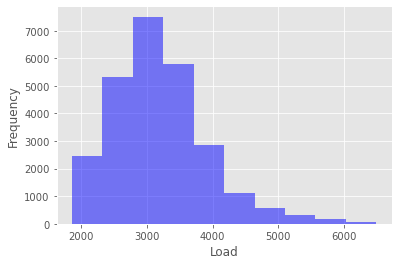

In [29]:
# Distribution of load 
plt.xlabel("Load")
plt.ylabel("Frequency")
num_bins = 10
n, bins, patches = plt.hist(connecticut['LoadMW'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

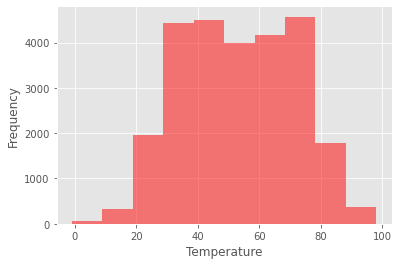

In [30]:
# Distribution of temperature
plt.xlabel("Temperature")
plt.ylabel("Frequency")
num_bins = 10
n, bins, patches = plt.hist(connecticut['TempF'], num_bins, facecolor='red', alpha=0.5)
plt.show()

In [31]:
# Timeseries of Load and Temperature across hours

# Let's try the week of 6/16/19-6/22/19
june19_dates = ['2019-06-16','2019-06-17','2019-06-18','2019-06-19','2019-06-20','2019-06-21','2019-06-22']
june19 = connecticut[connecticut["Date"].isin(june19_dates)] 

In [32]:
#june19

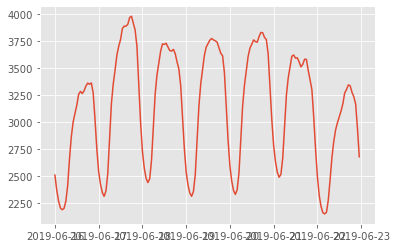

In [33]:
plt.plot(june19.DateTimeObj, june19.LoadMW)

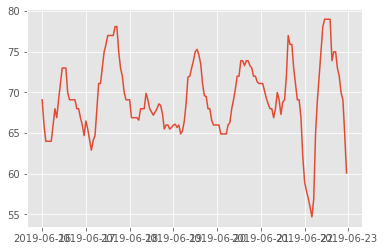

In [34]:
plt.plot(june19.DateTimeObj, june19.TempF)

In [35]:
# Let's try the week of 2/2/20-2/8/20
feb20_dates = ['2020-02-02','2020-02-03','2020-02-04','2020-02-05','2020-02-06','2020-02-07','2020-02-08']
feb20 = connecticut[connecticut["Date"].isin(feb20_dates)] 

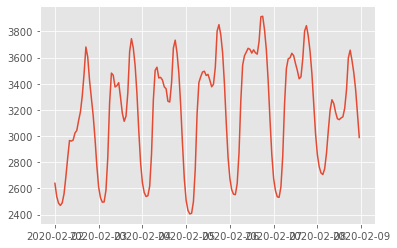

In [36]:
plt.plot(feb20.DateTimeObj, feb20.LoadMW)

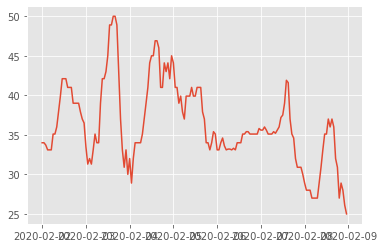

In [37]:
plt.plot(feb20.DateTimeObj, feb20.TempF)

# Creation of lagged load/weather variables


In [39]:
# Find min/max days and remove them... makes things easier
# And for the days surrounding the dates we had to remove
days_to_skip = ["2018-10-22","2021-10-19",'2020-08-03','2020-08-08']

Need to make sure I have 24 hours of data for each day, and all days needed. Start: 2018-10-22. End: 2021-10-19. Result is 1094 days (found using days between calculator.) I removed 4 days. So I have 1090 days. 24 hours in each means 1090x24=26160.

In [40]:
# Checking to make sure my math is correct.
len(connecticut)

26160

I can just lag back using the cells before. Make double sure that the df is in order by datetime.

In [41]:
connecticut = connecticut.sort_values(by = "DateTimeObj")

In [42]:
connecticut["LoadMW"]

0        2470.00
1        2397.00
2        2374.60
3        2392.00
4        2486.20
          ...   
26251    3314.37
26252    3156.57
26253    2927.33
26254    2655.19
26255    2411.18
Name: LoadMW, Length: 26160, dtype: float64

In [43]:
connecticut.columns

Index(['LoadMW', 'LocalDt', 'M', 'HourE', 'DOW', 'Holiday', 'DayType', 'Peak',
       'Station', 'TempF', 'Humidity', 'Date', 'DateTimeObj'],
      dtype='object')

In [44]:
# Load lag 1
LoadMW_Lag1 = connecticut["LoadMW"].shift(periods=1)
LoadMW_Lag1.name = 'LoadMW_Lag1'

# Load lag 2
LoadMW_Lag2 = connecticut["LoadMW"].shift(periods=2)
LoadMW_Lag2.name = 'LoadMW_Lag2'

# Load lag 3
LoadMW_Lag3 = connecticut["LoadMW"].shift(periods=3)
LoadMW_Lag3.name = 'LoadMW_Lag3'

# Temp lag 1
TempF_Lag1 = connecticut["TempF"].shift(periods=1)
TempF_Lag1.name = 'TempF_Lag1'

# Temp lag 2
TempF_Lag2 = connecticut["TempF"].shift(periods=2)
TempF_Lag2.name = 'TempF_Lag2'

# Temp lag 3
TempF_Lag3 = connecticut["TempF"].shift(periods=3)
TempF_Lag3.name = 'TempF_Lag3'

connecticut = pd.concat([connecticut, LoadMW_Lag1], axis=1)
connecticut = pd.concat([connecticut, LoadMW_Lag2], axis=1)
connecticut = pd.concat([connecticut, LoadMW_Lag3], axis=1)
connecticut = pd.concat([connecticut, TempF_Lag1], axis=1)
connecticut = pd.concat([connecticut, TempF_Lag2], axis=1)
connecticut = pd.concat([connecticut, TempF_Lag3], axis=1)


In [45]:
connecticut

,LoadMW,LocalDt,M,HourE,DOW,Holiday,DayType,Peak,Station,TempF,Humidity,Date,DateTimeObj,LoadMW_Lag1,LoadMW_Lag2,LoadMW_Lag3,TempF_Lag1,TempF_Lag2,TempF_Lag3
0,2470.00,10/22/2018 0:00,10,1,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,34.0,75.0,2018-10-22,2018-10-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2397.00,10/22/2018 1:00,10,2,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.9,78.0,2018-10-22,2018-10-22 01:00:00,2470.00,NaN,NaN,34.0,NaN,NaN
2,2374.60,10/22/2018 2:00,10,3,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,28.9,89.0,2018-10-22,2018-10-22 02:00:00,2397.00,2470.00,NaN,30.9,34.0,NaN
3,2392.00,10/22/2018 3:00,10,4,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.0,88.0,2018-10-22,2018-10-22 03:00:00,2374.60,2397.00,2470.00,28.9,30.9,34.0
4,2486.20,10/22/2018 4:00,10,5,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.9,82.0,2018-10-22,2018-10-22 04:00:00,2392.00,2374.60,2397.00,30.0,28.9,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,3314.37,10/19/2021 19:00,10,20,Tuesday,N,Weekday,On Peak,Hartford Brainard Arpt,55.4,62.0,2021-10-19,2021-10-19 19:00:00,3360.13,3203.04,3027.78,59.0,57.2,64.4
26252,3156.57,10/19/2021 20:00,10,21,Tuesday,N,Weekday,On Peak,Hartford Brainard Arpt,51.8,76.0,2021-10-19,2021-10-19 20:00:00,3314.37,3360.13,3203.04,55.4,59.0,57.2
26253,2927.33,10/19/2021 21:00,10,22,Tuesday,N,Weekday,On Peak,Hartford Brainard Arpt,53.6,67.0,2021-10-19,2021-10-19 21:00:00,3156.57,3314.37,3360.13,51.8,55.4,59.0
26254,2655.19,10/19/2021 22:00,10,23,Tuesday,N,Weekday,On Peak,Hartford Brainard Arpt,51.8,71.0,2021-10-19,2021-10-19 22:00:00,2927.33,3156.57,3314.37,53.6,51.8,55.4


# Creation of target variable(s): hours-ahead load



In [46]:
# Load t+1
LoadMW_Plus1 = connecticut["LoadMW"].shift(periods=-1)
LoadMW_Plus1.name = 'LoadMW_Plus1'

# Load t+2
LoadMW_Plus2 = connecticut["LoadMW"].shift(periods=-2)
LoadMW_Plus2.name = 'LoadMW_Plus2'

# Load t+3
LoadMW_Plus3 = connecticut["LoadMW"].shift(periods=-3)
LoadMW_Plus3.name = 'LoadMW_Plus3'

connecticut = pd.concat([connecticut, LoadMW_Plus1], axis=1)
connecticut = pd.concat([connecticut, LoadMW_Plus2], axis=1)
connecticut = pd.concat([connecticut, LoadMW_Plus3], axis=1)

In [47]:
connecticut

,LoadMW,LocalDt,M,HourE,DOW,Holiday,DayType,Peak,Station,TempF,...,DateTimeObj,LoadMW_Lag1,LoadMW_Lag2,LoadMW_Lag3,TempF_Lag1,TempF_Lag2,TempF_Lag3,LoadMW_Plus1,LoadMW_Plus2,LoadMW_Plus3
0,2470.00,10/22/2018 0:00,10,1,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,34.0,...,2018-10-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2397.00,2374.60,2392.00
1,2397.00,10/22/2018 1:00,10,2,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.9,...,2018-10-22 01:00:00,2470.00,NaN,NaN,34.0,NaN,NaN,2374.60,2392.00,2486.20
2,2374.60,10/22/2018 2:00,10,3,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,28.9,...,2018-10-22 02:00:00,2397.00,2470.00,NaN,30.9,34.0,NaN,2392.00,2486.20,2751.40
3,2392.00,10/22/2018 3:00,10,4,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.0,...,2018-10-22 03:00:00,2374.60,2397.00,2470.00,28.9,30.9,34.0,2486.20,2751.40,3216.00
4,2486.20,10/22/2018 4:00,10,5,Monday,N,Weekday,Off Peak,Hartford Brainard Arpt,30.9,...,2018-10-22 04:00:00,2392.00,2374.60,2397.00,30.0,28.9,30.9,2751.40,3216.00,3474.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,3314.37,10/19/2021 19:00,10,20,Tuesday,N,Weekday,On Peak,Hartford Brainard Arpt,55.4,...,2021-10-19 19:00:00,3360.13,3203.04,3027.78,59.0,57.2,64.4,3156.57,2927.33,2655.19
26252,3156.57,10/19/2021 20:00,10,21,Tuesday,N,Weekday,On Peak,Hartford Brainard Arpt,51.8,...,2021-10-19 20:00:00,3314.37,3360.13,3203.04,55.4,59.0,57.2,2927.33,2655.19,2411.18
26253,2927.33,10/19/2021 21:00,10,22,Tuesday,N,Weekday,On Peak,Hartford Brainard Arpt,53.6,...,2021-10-19 21:00:00,3156.57,3314.37,3360.13,51.8,55.4,59.0,2655.19,2411.18,NaN
26254,2655.19,10/19/2021 22:00,10,23,Tuesday,N,Weekday,On Peak,Hartford Brainard Arpt,51.8,...,2021-10-19 22:00:00,2927.33,3156.57,3314.37,53.6,51.8,55.4,2411.18,NaN,NaN


# Peak/nonpeak dummies

In [48]:
# Make dummy for peak/nonpeak
peakDummy = pd.get_dummies(connecticut['Peak'])
connecticut['OnPeak'] = peakDummy['On Peak']

# Make dummy for holiday
holidayDummy = pd.get_dummies(connecticut['Holiday'])
connecticut['Holiday'] = holidayDummy['Y']

In [49]:
# Make dummy for peak status in the next hour
Peak_Plus1 = connecticut["OnPeak"].shift(periods=-1)
Peak_Plus1.name = 'Peak_Plus1'

connecticut = pd.concat([connecticut, Peak_Plus1], axis=1)

In [50]:
# Remove duplicate values
connecticut = connecticut.drop_duplicates('LocalDt',keep='last')

In [51]:
connecticut.head()

,LoadMW,LocalDt,M,HourE,DOW,Holiday,DayType,Peak,Station,TempF,...,LoadMW_Lag2,LoadMW_Lag3,TempF_Lag1,TempF_Lag2,TempF_Lag3,LoadMW_Plus1,LoadMW_Plus2,LoadMW_Plus3,OnPeak,Peak_Plus1
0,2470.0,10/22/2018 0:00,10,1,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,34.0,...,NaN,NaN,NaN,NaN,NaN,2397.0,2374.6,2392.0,0,0.0
1,2397.0,10/22/2018 1:00,10,2,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,30.9,...,NaN,NaN,34.0,NaN,NaN,2374.6,2392.0,2486.2,0,0.0
2,2374.6,10/22/2018 2:00,10,3,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,28.9,...,2470.0,NaN,30.9,34.0,NaN,2392.0,2486.2,2751.4,0,0.0
3,2392.0,10/22/2018 3:00,10,4,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,30.0,...,2397.0,2470.0,28.9,30.9,34.0,2486.2,2751.4,3216.0,0,0.0
4,2486.2,10/22/2018 4:00,10,5,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,30.9,...,2374.6,2397.0,30.0,28.9,30.9,2751.4,3216.0,3474.2,0,0.0


In [52]:
peakDummyPlus1 = pd.get_dummies(connecticut['Peak_Plus1'])
connecticut['Peak_Plus1'] = peakDummyPlus1[1.0]

In [53]:
connecticut.head()

,LoadMW,LocalDt,M,HourE,DOW,Holiday,DayType,Peak,Station,TempF,...,LoadMW_Lag2,LoadMW_Lag3,TempF_Lag1,TempF_Lag2,TempF_Lag3,LoadMW_Plus1,LoadMW_Plus2,LoadMW_Plus3,OnPeak,Peak_Plus1
0,2470.0,10/22/2018 0:00,10,1,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,34.0,...,NaN,NaN,NaN,NaN,NaN,2397.0,2374.6,2392.0,0,0
1,2397.0,10/22/2018 1:00,10,2,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,30.9,...,NaN,NaN,34.0,NaN,NaN,2374.6,2392.0,2486.2,0,0
2,2374.6,10/22/2018 2:00,10,3,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,28.9,...,2470.0,NaN,30.9,34.0,NaN,2392.0,2486.2,2751.4,0,0
3,2392.0,10/22/2018 3:00,10,4,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,30.0,...,2397.0,2470.0,28.9,30.9,34.0,2486.2,2751.4,3216.0,0,0
4,2486.2,10/22/2018 4:00,10,5,Monday,0,Weekday,Off Peak,Hartford Brainard Arpt,30.9,...,2374.6,2397.0,30.0,28.9,30.9,2751.4,3216.0,3474.2,0,0


Save this CSV and do model building in a separate notebook.

In [54]:
# Writing CSV
connecticut.to_csv('data/connecticutData.csv', index=False)